# =============================================================
# INSTALL DEPENDENCIES UNTUK FUZZY MAMDANI
# =============================================================



In [ ]:
# Jalankan cell ini hanya sekali (gunakan tanda ! karena ini command terminal)
!pip install scikit-fuzzy matplotlib numpy

# =============================================================
# Implementasi Logika Fuzzy Mamdani – Penentuan Harga Gabah
# Berdasarkan Jurnal: Santoso & Setiawati (2023)
# =============================================================

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. DEFINISI VARIABEL FUZZY
# -------------------------------------------------------------

In [ ]:
# Variabel Input
kadar_air = ctrl.Antecedent(np.arange(0, 31, 0.1), 'kadar_air')           # (%)
kadar_hampa = ctrl.Antecedent(np.arange(0, 21, 0.1), 'kadar_hampa')       # (%)

In [ ]:
# Variabel Output
harga = ctrl.Consequent(np.arange(3000, 6001, 1), 'harga')                # (Rupiah/kg)

# -------------------------------------------------------------
# 2. FUZZIFIKASI – FUNGSI KEANGGOTAAN
# -------------------------------------------------------------
# Berdasarkan jurnal: rendah, sedang, tinggi
# Menggunakan fungsi segitiga (trimf) dan trapesium (trapmf)

In [ ]:
# Kadar Air
kadar_air['rendah'] = fuzz.trapmf(kadar_air.universe, [0, 0, 10, 15])
kadar_air['sedang'] = fuzz.trimf(kadar_air.universe, [10, 17.5, 25])
kadar_air['tinggi'] = fuzz.trapmf(kadar_air.universe, [20, 25, 30, 30])

In [ ]:
# Kadar Hampa/Kotoran
kadar_hampa['rendah'] = fuzz.trapmf(kadar_hampa.universe, [0, 0, 3, 6])
kadar_hampa['sedang'] = fuzz.trimf(kadar_hampa.universe, [5, 9, 13])
kadar_hampa['tinggi'] = fuzz.trapmf(kadar_hampa.universe, [12, 15, 20, 20])

In [ ]:
# Harga Gabah
harga['murah'] = fuzz.trapmf(harga.universe, [3000, 3000, 3800, 4500])
harga['sedang'] = fuzz.trimf(harga.universe, [4200, 4800, 5200])
harga['mahal'] = fuzz.trapmf(harga.universe, [5000, 5500, 6000, 6000])

# -------------------------------------------------------------
# 3. RULE BASE – ATURAN FUZZY
# -------------------------------------------------------------

In [ ]:
rule1 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['rendah'], harga['mahal'])
rule2 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['sedang'], harga['mahal'])
rule3 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['tinggi'], harga['sedang'])
rule4 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['rendah'], harga['mahal'])
rule5 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['sedang'], harga['sedang'])
rule6 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['tinggi'], harga['murah'])
rule7 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['rendah'], harga['sedang'])
rule8 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['sedang'], harga['murah'])
rule9 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['tinggi'], harga['murah'])

# -------------------------------------------------------------
# 4. SISTEM KONTROL FUZZY
# -------------------------------------------------------------

In [ ]:
harga_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])
harga_simulasi = ctrl.ControlSystemSimulation(harga_ctrl)

# -------------------------------------------------------------
# 5. INPUT NILAI UJI (dari jurnal)
# -------------------------------------------------------------

In [ ]:
# Nilai dari penelitian: kadar air = 19.03%, kadar hampa = 5.08%
harga_simulasi.input['kadar_air'] = 19.03
harga_simulasi.input['kadar_hampa'] = 5.08

In [ ]:
# Proses inferensi dan defuzzifikasi (metode centroid)
harga_simulasi.compute()

# -------------------------------------------------------------
# 6. OUTPUT HASIL
# -------------------------------------------------------------

In [ ]:
print("=== HASIL PENENTUAN HARGA GABAH (Metode Mamdani) ===")
print(f"Kadar Air        : {19.03}%")
print(f"Kadar Hampa       : {5.08}%")
print(f"Hasil Defuzzifikasi (Harga Gabah): Rp {harga_simulasi.output['harga']:.2f}")

=== HASIL PENENTUAN HARGA GABAH (Metode Mamdani) ===
Kadar Air        : 19.03%
Kadar Hampa       : 5.08%
Hasil Defuzzifikasi (Harga Gabah): Rp 5487.50


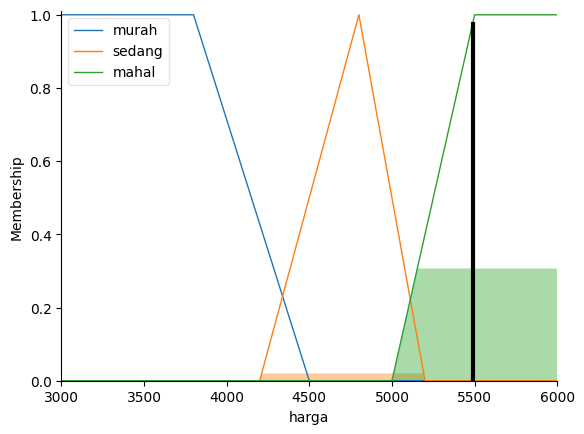

In [ ]:
# Visualisasi hasil output fuzzy
harga.view(sim=harga_simulasi)
plt.show()

# -------------------------------------------------------------
# (Opsional) Visualisasi fungsi keanggotaan
# -------------------------------------------------------------

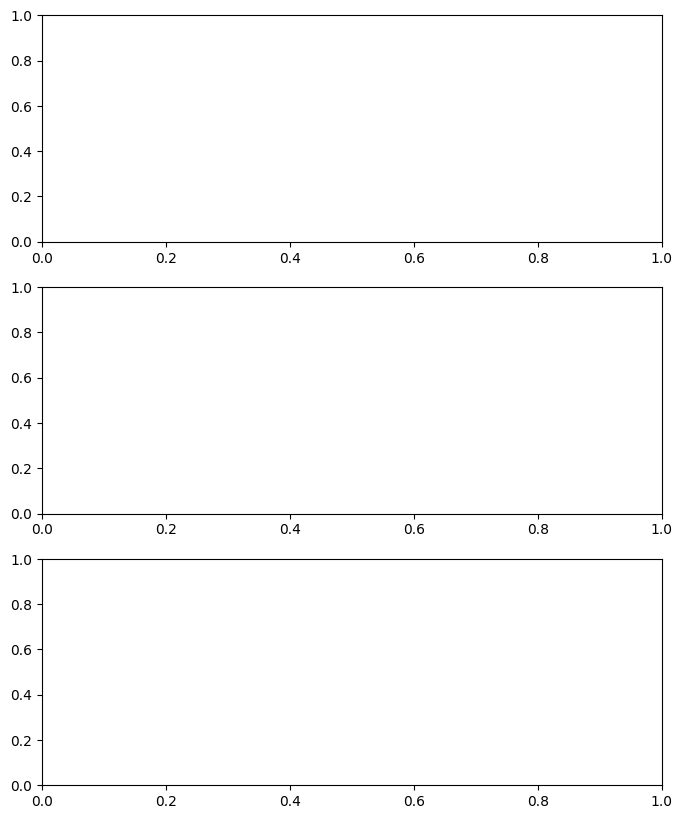

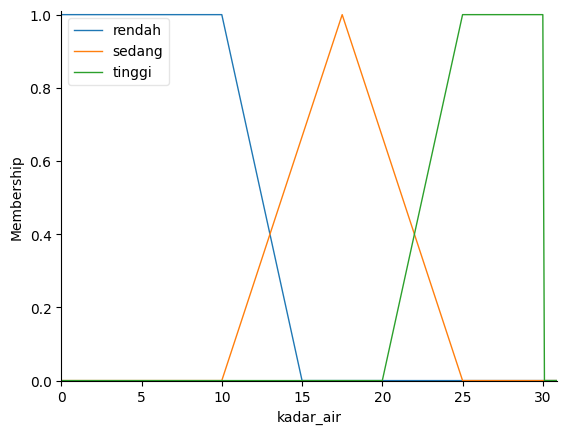

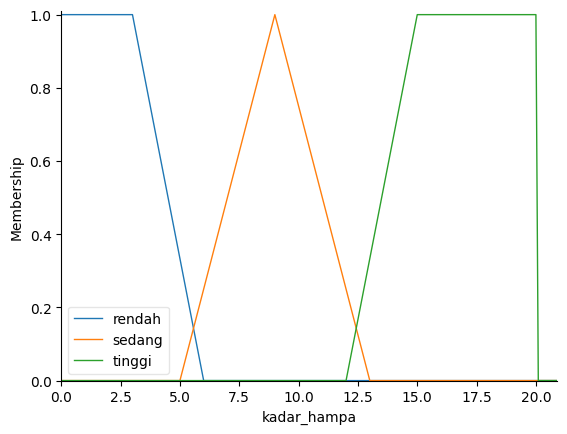

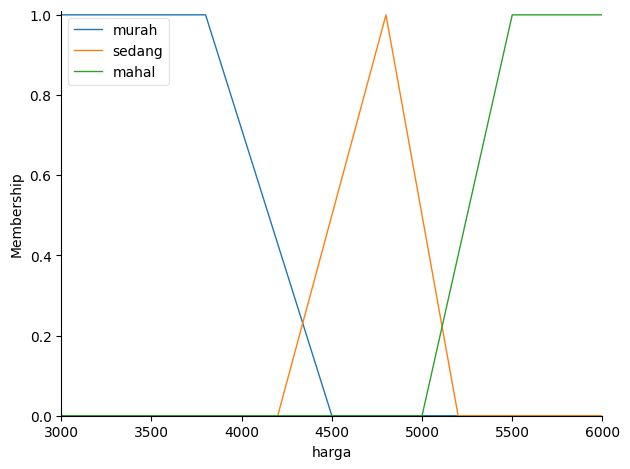

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(8, 10))

kadar_air.view(ax=axs[0])
kadar_hampa.view(ax=axs[1])
harga.view(ax=axs[2])

plt.tight_layout()
plt.show()